In [1]:
import muon as mu
import os

/home/zuzanna/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pca_model import PCA_Model
from dataloader import DataLoader


In [3]:
# Load the data using DataLoader
file_path = "100_tea_preprocessed.h5mu.gz"  
data_loader = DataLoader(file_path=file_path)
dataset = data_loader.read_mudata()  

/home/zuzanna/miniconda3/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [4]:
# Initialize PCA_Model
data_dir = "./test_output" 
os.makedirs(data_dir, exist_ok=True)
pca_model = PCA_Model(data_dir=data_dir, dataset=dataset, n_components=10, name="100_tea")


Initializing PCA Model


In [5]:
# Perform PCA
pca_model.train()


Training PCA Model
PCA completed with 10 components


In [6]:
# Inspect PCA results
for modality in dataset.mod.keys():
    print(f"\n{modality.upper()} PCA Embeddings:")
    print(dataset[modality].obsm['X_pca'])



RNA PCA Embeddings:
[[-6.748935   -1.8489327   0.9103463  ... -0.370269    0.12199878
  -0.7868903 ]
 [17.585709   -6.4863744   2.4146733  ...  0.77128285 -0.83698237
   2.0767186 ]
 [-5.197887   -4.2318993  -4.7785797  ...  0.91215837 -1.9676037
   0.41462883]
 ...
 [-6.7907805   2.0022142   8.280294   ...  4.874333   -4.0553665
   4.23352   ]
 [-3.403318   -3.5727255  -2.3219936  ...  0.4006748   2.691525
  -1.6348215 ]
 [-4.7581553  -5.136541   -5.1400056  ...  2.7212963   0.9946163
  -0.02482996]]

ATAC PCA Embeddings:
[[-6.748935   -1.8489327   0.9103463  ... -0.370269    0.12199878
  -0.7868903 ]
 [17.585709   -6.4863744   2.4146733  ...  0.77128285 -0.83698237
   2.0767186 ]
 [-5.197887   -4.2318993  -4.7785797  ...  0.91215837 -1.9676037
   0.41462883]
 ...
 [-6.7907805   2.0022142   8.280294   ...  4.874333   -4.0553665
   4.23352   ]
 [-3.403318   -3.5727255  -2.3219936  ...  0.4006748   2.691525
  -1.6348215 ]
 [-4.7581553  -5.136541   -5.1400056  ...  2.7212963   0.9946163

In [7]:
# Save PCA latent embeddings
pca_model.save_latent()


Saving PCA latent embeddings
Latent data saved to ./test_output/pca_100_tea.h5ad


/home/zuzanna/miniconda3/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


Generating UMAP with PCA embeddings


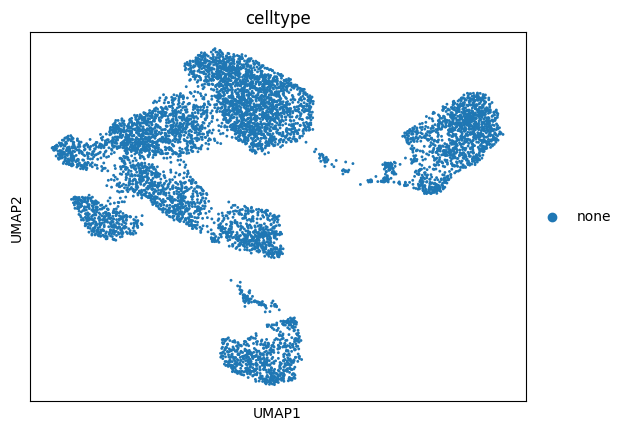

UMAP plot saved as 100_tea_pca_umap.png


In [8]:
# Generate UMAP visualization (optional)
pca_model.umap(random_state=42, filename="100_tea_pca_umap.png")